Homework 10 Key
===
#### CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1 (3/30/2016)

----

0. Revise a Problem (15 Bonus Points on HW 7)
====

Revist a problem you got wrong on homework 7. If you got a perfect score in homework 7, state that fact. Go through each part you missed and state what your answer was and what your mistake was. If you completed this already on homework 8, state that you completed this on homework 8

For example:

#### Problem 1.1

My answer used the scipy `comb` function instead of `factorial`. 


1. Short Answer Problems (16 Points)
====

1. A $t$-test and $zM$ test rely on the assumption of normality. How could you test that assumption?
2. What is $\hat{\alpha}$ in OLS? Use words.
3. What is $S_{\epsilon}$ in OLS? Use words. 
4. What is the difference between SSR and TSS? Use words
5. We learned three ways to do regression. One way was with algebraic equations (OLS-1D). What were the other two ways?
6. What are the steps to complete for a good regression analysis?
7. Is a goodness of fit applicable to a non-linear regression?
8. If you residuals are not normal, is a regression still valid?

1. Answers
===

1. Shapiro Wilks
2. The best-fit intercept
3. The standard error in residuals
4. SSR is the sum of squared distance between fit y and data y. TTS is the sum of squared distance between average y and all y data.
5. With optimization (minimization) and matrix algebra
6. (1) Justify with Spearmann test (2) Regress (3) Check normality of residuals (4) hypothesis tests/confidence intervals as needed
7. Yes
8. no

2. Exercises (24 Points)
====

1. Are these numbers normally distributed? `[-26.6,-24.0, -20.9, -25.8, -24.3, -22.6, -23.0, -26.8, -26.5, -23.6, -20.0, -23.1, -22.4, -22.5]`
2. Given $\hat{\alpha} = 1.2$, $\hat{\beta} = -5.3$, $N = 14$, $S^2_\alpha = 0.8$, $S^2_\epsilon = 0.2$, $S^2_\beta = 12$, conduct a hypothesis test on the existence of the intercept.
3. Conduct a hpyothesis test for the slope being negative using the above data. This is a one-sided hypothesis test. *Hint: a good null hypothesis would be that the slope is positive*
4. Write a function which computes the SSR for $\hat{y} = \beta_0 + \beta_1 \cos \beta_2 x $. Your function should take in one argument. You may assume $x$ and $y$ are defined. 
5. In OLS-ND, if my ${\mathbf X}$ has dimensions of $53 \times 5$, how many degrees of freedom do I have?
6. If my model equation is $\hat{z} = \beta_0 x y^{\,\beta_1}$, what would ${\mathbf F_{21}}$ be if $\hat{\beta_0} = 1.5$, $\hat{\beta_1} = 2.0$, $x_1 = 1.0$, $x_2 = 1.5$, $y_1 = 0.5$, $y_2 = 1.2$.

#### 2.1 Answer

In [1]:
import scipy.stats as ss

ss.shapiro([-26.6,-24.0, -20.9, -25.8, -24.3, -22.6, -23.0, -26.8, -26.5, -23.6, -20.0, -23.1, -22.4, -22.5])

(0.9431244730949402, 0.459816575050354)

The $p$-value is 0.46, so the data is likely normal

#### 2.2 Answer

The null hypothesis is that $\hat{\alpha} = 0$. Since we're testing against the null hpyothesis, our degrees of freedom will be $N - 1$. 

In [8]:
import numpy as np
T = (1.2 - 0) / np.sqrt(1.2)
1 - (ss.t.cdf(T, 14- 1) - ss.t.cdf(-T, 14- 1))

0.29320175545643901

The $p$-value is 0.29, so we cannot reject the null hypothesis. No intercept necessary

#### 2.3 Answer

Let's make the null hypothesis that the slope is positive. We will create a T statistic, which should correspond to some interval/$p$-value that gets smaller (closer to our significance threshold) as we get more negative in our slope. This will work:

$$ p = \int_{-\infty}^{T} p(T)$$ 

where $T$ is our negative value reflecting how negative the slope is.

You can use 1 or 2 deducted degrees of freedom. 1 is correct, since there is no degree of freedom for the intercept here, but it's a little bit tricky to see that.

In [11]:
T = -5.3 / np.sqrt(12)
ss.t.cdf(T, 14 - 1)

0.074992802274412171

Due to the high standard error, there is not enough evidence to reject the null hpyothesis of a positive slope

#### 2.4 Answer

In [ ]:
def ssr(beta):
    yhat=  beta[0] + beta[1] * np.cos(x * beta[2])
    return np.sum( (y - yhat)**2)

#### 2.5 Answer

$N - D = 43$

2.6 Answer
---

$$F_{21} = \frac{\partial f(\hat{\beta}, x_2)}{\partial \beta_1} = \hat{\beta}_0 x_2 y_2^{\hat{\beta}_1} \ln y_2$$


In [2]:
from math import log
1.5 * 1.5 * 1.2**(2.0) * log(1.2)

0.5907218440124128

3. Regression in Excel (30 Points)
===

Regress the data in the next cell to a slope/intercept equation. Use the `np.savetxt` to create a CSV file. Provide the following labeled/bolded quantities at the top of your Excel file:

1. The slope with confidence interval
2. The intercept with confidence interval
3. A $p$-value for existence of slope. Use Excel to generate your T value.

You do not need to do all the steps for a good regression, but do make a plot of your fit and the data. Use the `linest` command in Excel to compute the slope/intercept and standard errors

In [13]:
x = [0.5,1.3, 2.1, 1.0, 2.1, 1.7, 1.2, 3.9, 3.9, 1.5, 3.5, 3.9, 5.7, 4.7, 5.8, 4.6, 5.1, 5.9, 5.5, 6.4, 6.7, 7.8, 7.4, 6.7, 8.4, 6.9, 10.2, 9.7, 10.0, 9.9]
y = [-1.6,0.5, 3.0, 3.1, 1.5, -1.8, -3.6, 7.0, 8.6, 2.2, 9.3, 3.6, 14.1, 9.5, 14.0, 7.4, 6.4, 17.2, 11.8, 12.2, 18.9, 21.9, 20.6, 15.7, 23.7, 13.6, 26.8, 22.0, 27.5, 23.3]

In [15]:
np.savetxt(fname='data.csv', delimiter=',', X=np.column_stack( (x, y)))

Answer
====

As reported by linest:

1. Slope is $3.0 \pm 0.3$
2. Intercept is $-4 \pm 2$
3. The $p$-value is $0.00016$

4. Regression in Matlab (30 Points)
===

Regress the following non-linear equation in Matlab:

$$y =\beta_0 + \beta_1 x + \beta_2 x^2 $$

Perform the regression with and without $\beta_2$. Should there be a $\beta_2$ term? Justify your answer. You do not need to do all the steps for a good regression. Do plot your two regressions and original data.

*Hints*:

1. Try doing this in a MATLAB notebook so that you have syntax highlighting and autocomplete
2. We do not have the stats module installed for Matlab, so if you have a T-statistic you need to evaluate use a quick python cell or look it up in a table.
3. If you find yourself doing very complex optimization, stop and think. 

In [4]:
x = [-5.8,-4.6, -3.9, -3.4, -1.8, -2.1, -3.0, -0.8, 0.4, -0.2, -0.4, -0.0, 2.0, 1.1, 1.4, 1.2, 3.3, 4.3, 4.3, 3.0]
y = [-6.4,-7.7, -9.3, -9.2, -8.9, -7.3, -9.5, -5.0, -3.7, -6.9, -4.0, -3.8, 2.6, -0.6, -0.7, -0.1, 5.0, 4.8, 8.5, 2.5]

4 Answer
===

We will linearize the equation to dimensions $\left[1, x, x^2\right]$ and dimensions $\left[1, x\right]$ using the equations from lecture notes. Note: writing the code below is easier done in a matlab notebook and then copied back. That will you give you autocomplete, syntax highlighting, etc.

In [2]:
%load_ext pymatbridge

/opt/conda/lib/python3.5/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-63ba66af-af8a-4c0d-b79b-387d517c5d21
Send 'exit' command to kill the server
......MATLAB started and connected!



beta_mat_1 =

   -2.5642
    1.6834


beta_mat_2 =

   -4.2625
    1.8871
    0.2124


dof_2 =

    17


s_b_2 =

    0.4589
    0.1228
    0.0392


T =

    0.4629         0         0



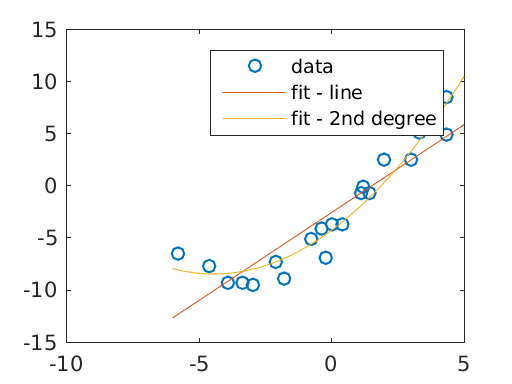

In [69]:
%%matlab

x = [-5.8,-4.6, -3.9, -3.4, -1.8, -2.1, -3.0, -0.8, 0.4, -0.2, -0.4, -0.0, 2.0, 1.1, 1.4, 1.2, 3.3, 4.3, 4.3, 3.0];
y = [-6.4,-7.7, -9.3, -9.2, -8.9, -7.3, -9.5, -5.0, -3.7, -6.9, -4.0, -3.8, 2.6, -0.6, -0.7, -0.1, 5.0, 4.8, 8.5, 2.5];
[nothing N] = size(x);

%get regressed fit
x_mat_1 = cat(1, ones(1, N), x)';
beta_mat_1 = inv(x_mat_1' * x_mat_1) * x_mat_1' * y'

%get regressed fit for 2nd degree polynomial
x_mat_2 = cat(1, ones(1, N), x, x .^ 2)';
beta_mat_2 = inv(x_mat_2' * x_mat_2) * x_mat_2' * y'

%get DOF
dof_2 = N - 3

%get error
s2_e_2 = sum((x_mat_2 * beta_mat_2 - y') .^ 2) / dof_2;
s_b_2 = sqrt(diag((s2_e_2 * inv(x_mat_2' * x_mat_2))))

%compute T-value
T = beta_mat_2(3) / s_b_2

%for plotting, some of the x values are out of order so I'll make new ones

x_plot = linspace(-6, 5, 100);
x_mat_plot_2 = cat(1, ones(1, 100), x_plot, x_plot .^ 2)';               
x_mat_plot_1 = cat(1, ones(1, 100), x_plot)';               
                              
               
plot(x, y, 'o')
hold on
plot(x_plot, x_mat_plot_1 * beta_mat_1, '-')
plot(x_plot, x_mat_plot_2 * beta_mat_2, '-')
legend('data', 'fit - line', 'fit - 2nd degree')           

Our $T$-value is 0.46. Our MATLAB install doesn't have the stats add-on, so we'll use a table or Python to look up the CDF function. Our degrees of freedom comes from the null hypothesis, which is $N - 2 = 18$

In [70]:
import scipy.stats as ss

1 - (ss.t.cdf(0.46, 18) - ss.t.cdf(-0.46, 18))

0.67448795203602119

So we do not have enough evidence for the extra $x^2$ term in the regression. The fit parameters are -2.5 (intercept) and 1.7 (slope)

5. Python Regression (40 Points)
===

Regress the following data to this equation:

$$ \hat{y} = \beta_0 \ln \frac{x}{\beta_1} $$

Follow regression best practices, including writing out all necessary equations in Markdown

In [72]:
x = [1.4,2.3, 3.7, 5.3, 6.6, 8.2, 10.2, 11.8, 12.7, 13.3, 14.6, 17.3, 18.6, 19.5, 21.6, 22.7, 23.6, 24.1]
y = [1.0,0.3, -0.1, -0.1, -0.3, -0.4, -0.4, -0.5, -0.4, -0.5, -0.4, -0.6, -0.8, -0.8, -0.6, -0.9, -0.7, -1.1]

Answer
====

Justification for Regression - 5 Points
----

In [73]:
ss.spearmanr(x, y)

SpearmanrResult(correlation=-0.94908957538478655, pvalue=1.9331992674483357e-09)

There is a strong correlation in the data, with a $p$-value of $10^{-9}$. This indicates a regression is justified to perform

Regression - 15 Points
---

In [76]:
import numpy as np
import scipy.optimize as opt
def ssr(betas, data):
    '''Compute the SSR given the betas and the data. The data should be a list containing two arrays, the x and y data.'''
    x = data[0]
    y = data[1]
    yhat = betas[0] * np.log(x / betas[1])
    return np.sum((yhat - y)**2)

#test my function
betas = [1,1]
x = np.array(x)
y = np.array (y)
ssr(betas, data=[x, y])

163.68741683206491

In [80]:
result = opt.minimize(ssr, x0=[1,1], args=([x,y],))
print(result.x)

#check another point to see if it's non-concex

result = opt.minimize(ssr, x0=[-2,100], args=([x,y]))
print(result.x)

[-0.54241704  4.88797879]
[  3.06930609e-02   1.98446026e+06]


This is a non-convex problem based on this test. I will use basin-hopping then

In [85]:
minimizer_kwargs = {'args': ([x,y])}
result = opt.basinhopping(ssr, x0=[1000,1000], niter=1000, minimizer_kwargs=minimizer_kwargs)
print(result)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log


                        fun: nan
 lowest_optimization_result:       fun: nan
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ nan,  nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 168
      nit: 1
     njev: 42
   status: 2
  success: False
        x: array([ -7.95180056e+08,  -1.68578072e+08])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 1001
                       nfev: 4168
                        nit: 1000
                       njev: 1042
                          x: array([ -7.95180056e+08,  -1.68578072e+08])


It tried to put negative values in a log, so I will add a bound

In [86]:
minimizer_kwargs = {'args': ([x,y]), 'bounds':[(-np.infty, np.infty), (10**-10, np.infty)]}
result = opt.basinhopping(ssr, x0=[100,100], niter=10000, minimizer_kwargs=minimizer_kwargs)
print(result)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.5/site-packages/scipy/optimize/optimize.py:562: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


                        fun: 0.40943835301483816
 lowest_optimization_result:       fun: 0.40943835301483816
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.88737914e-07,   5.55111512e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 267
      nit: 44
   status: 0
  success: True
        x: array([-0.54241703,  4.88797866])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 11
                       nfev: 403323
                        nit: 10000
                          x: array([-0.54241703,  4.88797866])


In [87]:
#store them in a nice spot for later
beta_hat = result.x

Checking Residuals and Fit - 5 Points
---

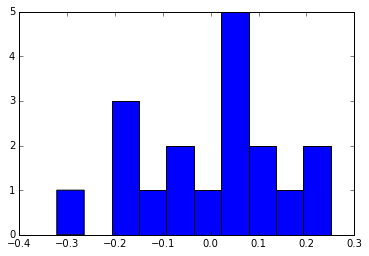

(0.9713913798332214, 0.8234127163887024)
0.894730890526


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
resids = beta_hat[0] * np.log(x / beta_hat[1]) - y
plt.hist(resids)
plt.show()
print(ss.shapiro(resids))

SSR = np.sum(resids ** 2)
TSS = np.sum((np.mean(y) - y)**2)
print(1 - SSR / TSS)

The $R^2$ value is $0.895$ and the $p$-value for normality is $0.82$. These two data together show that the residuals are likely normally distributed and the regression fits well

Plotting the fit - 5 Points
---

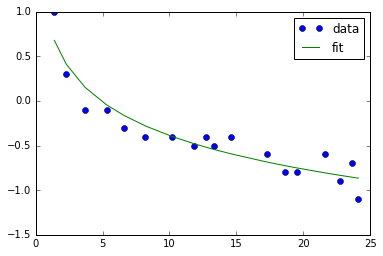

In [93]:
plt.plot(x,y,'o', label='data')
plt.plot(x, beta_hat[0] * np.log(x / beta_hat[1]), label='fit')
plt.legend()
plt.show()

The fit looks excellent

Error Analysis - 10 Points
---

The partials needed for error analysis are:

$$\frac{\partial f(x_i, \hat{\beta})}{\partial \beta_0} = \ln \frac{x}{\beta_1}$$

$$\frac{\partial f(x_i, \hat{\beta})}{\partial \beta_1} = -\beta_0 \frac{\beta_1}{x} \frac{x}{\beta_1^2} = -\frac{\beta_0}{\beta_1}$$

In [106]:
import scipy.linalg as linalg

#compute the F-matrix 
F_mat = np.column_stack( (np.log(x / beta_hat[1]), np.ones(len(x)) * -beta_hat[0] / beta_hat[1]) )

#standard error in residuals
s2_e = np.sum(resids**2) / (len(x) - len(beta_hat))
#standard error in parametrs
s2_b = s2_e * linalg.inv(F_mat.transpose().dot(F_mat))
#go from matrix of squares to actual standard errors
s_b = np.sqrt(np.diag(s2_b))

#use a for loop to print them all pretty
from IPython import display

for beta, se,i in zip(beta_hat, s_b, range(len(s_b))):
    display.display(display.Latex('$\\beta_{} = {:.2} \pm {:.2}$'.format(i, beta, se * ss.t.ppf(0.975, len(x) - len(beta_hat)))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>